### Логистическая регрессия

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
x_data = np.arange(10)
x = x_data.reshape(-1, 1)
y = np.array([0,0,0,0,0,1,1,1,1,1])
np.shape(x)

(10, 1)

In [3]:
model = LogisticRegression(solver = 'liblinear', random_state = 0)

In [4]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
print(f"Классы модели {model.classes_}")
print(f"Коэффициенты модели {model.coef_}")
print(f"Свободный член модели {model.intercept_}")

Классы модели [0 1]
Коэффициенты модели [[0.4108015]]
Свободный член модели [-1.20162483]


In [6]:
# Вероятности классификации
# 1 столбец - вероятность того что элем-т относится к 1-му классу
# 2 столбец - вероятность того что элем-т относится ко 2-му классу
model.predict_proba(x)

array([[0.76881371, 0.23118629],
       [0.68800809, 0.31199191],
       [0.59387837, 0.40612163],
       [0.49230569, 0.50769431],
       [0.39136427, 0.60863573],
       [0.29893328, 0.70106672],
       [0.22042624, 0.77957376],
       [0.15789351, 0.84210649],
       [0.11058424, 0.88941576],
       [0.07616801, 0.92383199]])

In [7]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [8]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [9]:
# Точность
model.score(x, y)

0.8

In [10]:
cm = confusion_matrix(y, model.predict(x))
print(cm)
# 3 - угадали правильно для 1 класса
# 2 - угадали НЕ правильно для 1 класса
# 0 - угадали правильно для 2 класса
# 5 - угадали НЕ правильно для 2 класса

[[3 2]
 [0 5]]


In [11]:
# Выводим все возможные метрики
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



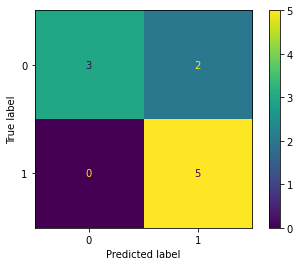

In [12]:
# Визуализация матрицы
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Регуляризация

In [13]:
model = LogisticRegression(solver = 'liblinear', C = 9.0, random_state = 0)
model.fit(x, y)
print(f"Классы модели {model.classes_}")
print(f"Коэффициенты модели {model.coef_}")
print(f"Свободный член модели {model.intercept_}")

Классы модели [0 1]
Коэффициенты модели [[0.91213864]]
Свободный член модели [-3.71965528]


In [14]:
print(model.predict(x))
print(y)

[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1]


In [15]:
model.score(x, y)

1.0

In [16]:
model.predict_proba(x)

array([[0.97633146, 0.02366854],
       [0.94308066, 0.05691934],
       [0.86936751, 0.13063249],
       [0.7277505 , 0.2722495 ],
       [0.5177677 , 0.4822323 ],
       [0.30131623, 0.69868377],
       [0.14764699, 0.85235301],
       [0.06505132, 0.93494868],
       [0.02718698, 0.97281302],
       [0.01110061, 0.98889939]])

In [17]:
cm = confusion_matrix(y, model.predict(x))
print(cm)

[[5 0]
 [0 5]]


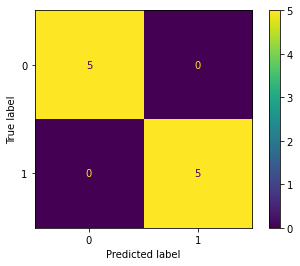

In [18]:
# Визуализация матрицы
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [19]:
from scipy.special import expit
logit = x * model.coef_ + model.intercept_
loss = expit(x * model.coef_ + model.intercept_).ravel()
logit

array([[-3.71965528],
       [-2.80751664],
       [-1.895378  ],
       [-0.98323936],
       [-0.07110072],
       [ 0.84103792],
       [ 1.75317656],
       [ 2.6653152 ],
       [ 3.57745384],
       [ 4.48959248]])

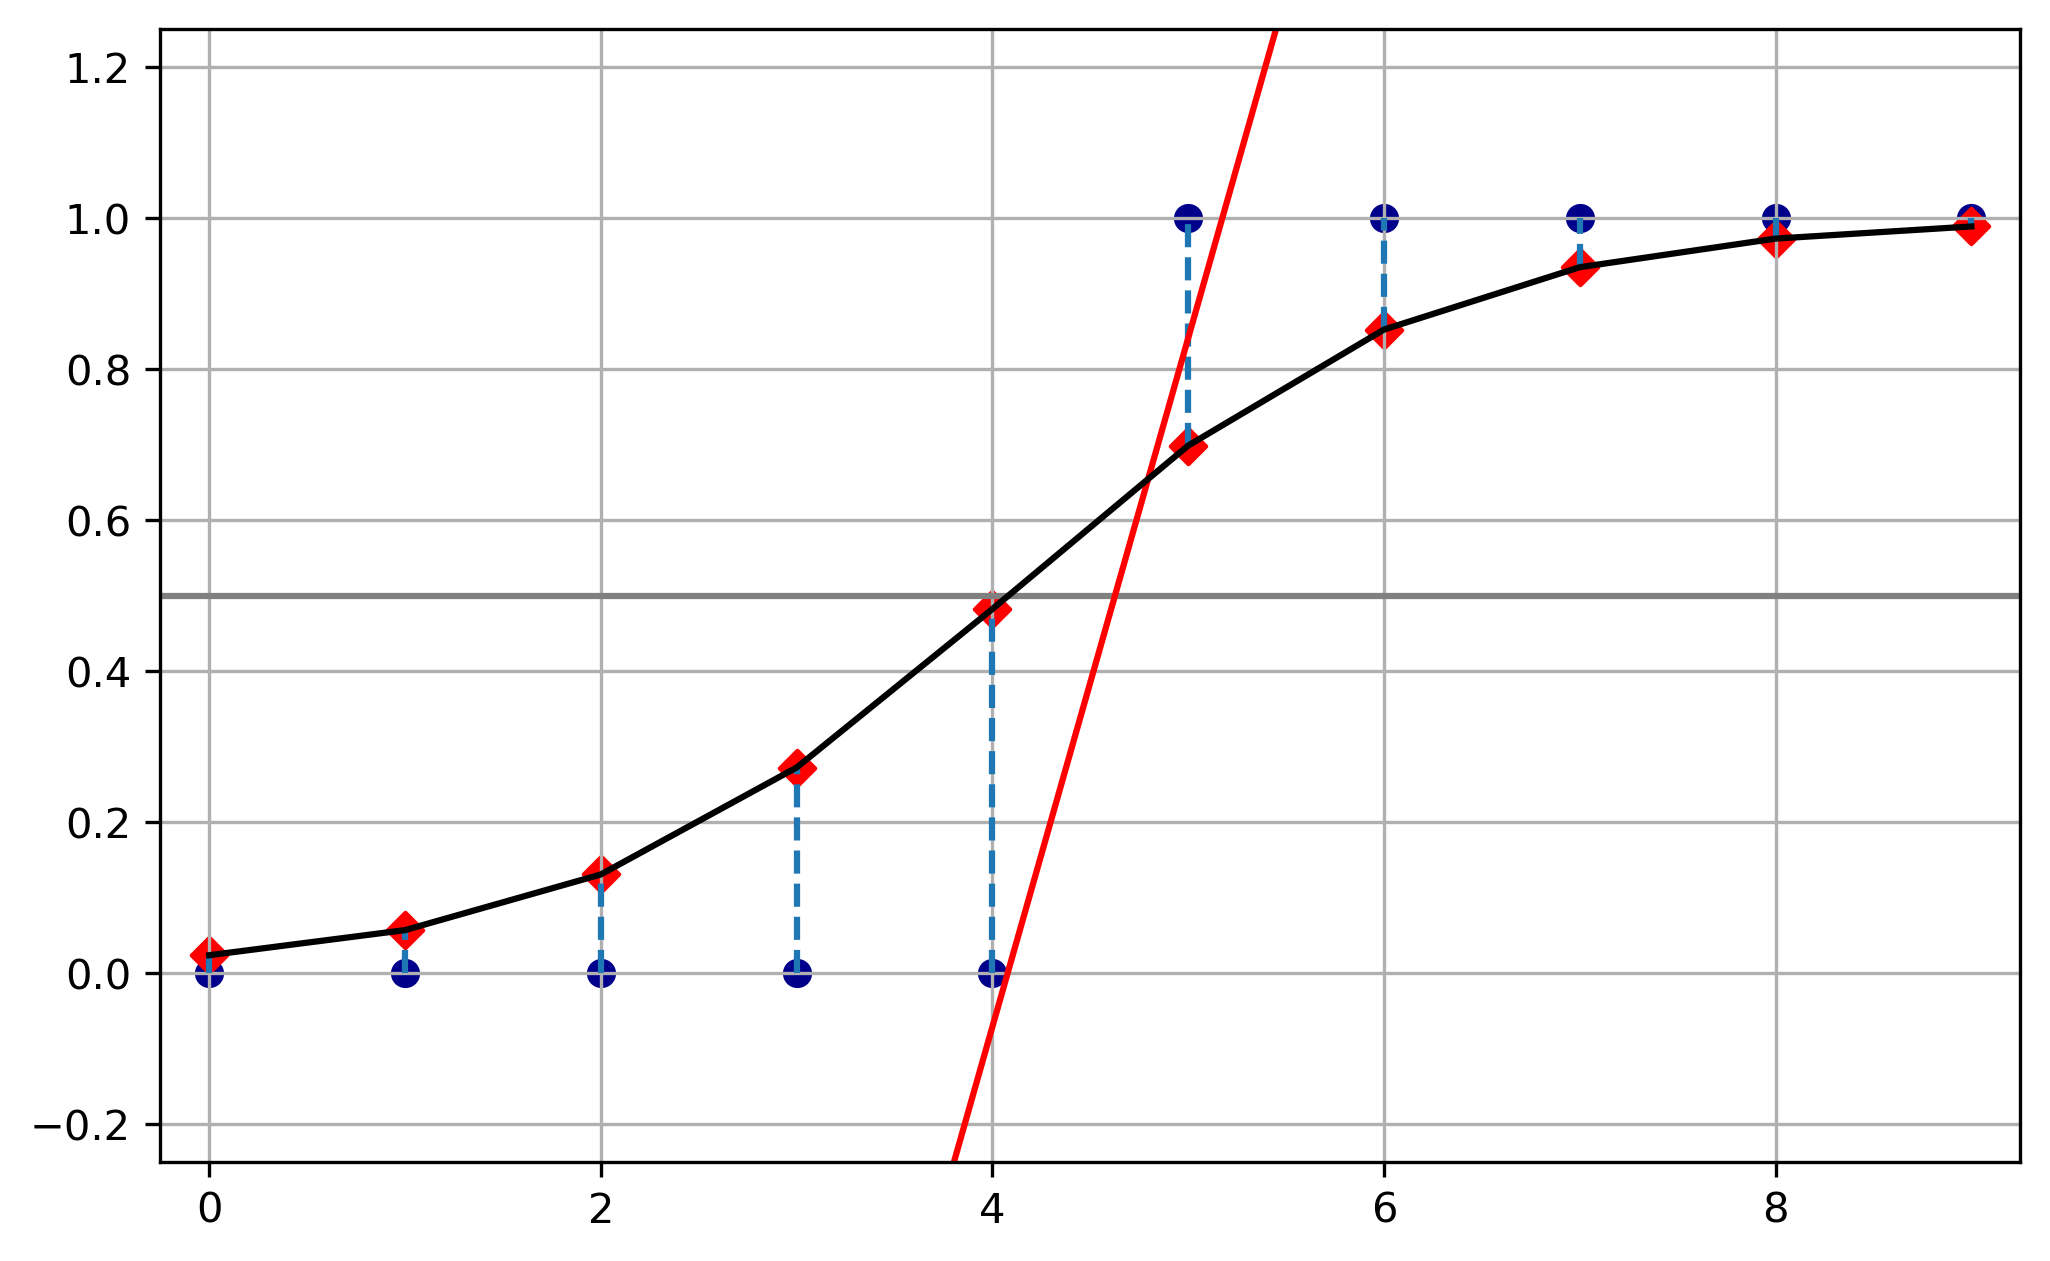

In [20]:
fig, axs = plt.subplots(figsize = (8, 5), dpi = 300)
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 9.25)
plt.scatter(x, y, color = 'darkblue')
plt.axhline(0.5, color = '0.5')
for i in range(5,10): plt.axvline(x = i, linestyle = '--',
                                  ymin = (loss[i] + 0.25)/1.5,
                                  ymax = (1 + 0.25)/1.5)
for i in range(5): plt.axvline(x = i, linestyle = '--',
                               ymin = (0 + 0.25)/1.5,
                               ymax = (loss[i] + 0.25)/1.5)
plt.plot(x, logit, color = 'red')
plt.scatter(x, loss, marker = 'D', color = 'red')
plt.plot(x, loss, color = 'black')
plt.grid()